In [1]:
"""Problem Statement

The people of New Yorker use the 311 system to report complaints about the non-emergency problems to local authorities. Various agencies in New York are assigned these problems. The Department of Housing Preservation and Development of New York City is the agency that processes 311 complaints that are related to housing and buildings.

In the last few years, the number of 311 complaints coming to the Department of Housing Preservation and Development has increased significantly. Although these complaints are not necessarily urgent, the large volume of complaints and the sudden increase is impacting the overall efficiency of operations of the agency.

Therefore, the Department of Housing Preservation and Development has approached your organization to help them manage the large volume of 311 complaints they are receiving every year.

The agency needs answers to several questions. The answers to those questions must be supported by data and analytics. These are their  questions:

Which type of complaint should the Department of Housing Preservation and Development of New York City focus on first?
Should the Department of Housing Preservation and Development of New York City focus on any particular set of boroughs, ZIP codes, or street (where the complaints are severe) for the specific type of complaints you identified in response to Question 1?
Does the Complaint Type that you identified in response to question 1 have an obvious relationship with any particular characteristic or characteristics of the houses or buildings?
Can a predictive model be built for a future prediction of the possibility of complaints of the type that you have identified in response to question 1?
Your organization has assigned you as the lead data scientist to provide the answers to these questions. You need to work on getting answers to them in this Capstone Project by following the standard approach of data science and machine learning."""
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn

In [2]:
df_311=pd.read_csv('https://data.cityofnewyork.us/resource/fhrw-4uyv.csv?$limit=100000000&Agency=HPD&$select=created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,\
closed_date,location_type,status', parse_dates=['created_date','closed_date'])


In [3]:
#df_311.dtypes

In [4]:
# df_311['incident_zip']=df_311[(df_311['incident_zip'].map(pd.isnull))]

In [5]:
df_311.shape

(5803016, 15)

In [6]:
df_311.head(3)

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2013-01-11 13:25:34,24765056,HPD Literature Request,NaN,NaN,NaN,NaN,NaN,The literature has been mailed. If it has not ...,Unspecified,NaN,NaN,2013-01-11 15:01:56,NaN,Closed
1,2018-08-11 19:19:41,39981834,PAINT/PLASTER,11429.0,104-34 219 STREET,219 STREET,ADDRESS,Queens Village,The Department of Housing Preservation and Dev...,QUEENS,40.711539,-73.735724,2019-03-30 08:58:02,RESIDENTIAL BUILDING,Closed
2,2018-08-11 19:19:41,39982698,APPLIANCE,11429.0,104-34 219 STREET,219 STREET,ADDRESS,Queens Village,The Department of Housing Preservation and Dev...,QUEENS,40.711539,-73.735724,2019-03-30 08:58:01,RESIDENTIAL BUILDING,Closed


In [7]:
###
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_6b0a19571a3d4a43a571d1f276a248bd = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Ht5MWbsX9xDZZrKhS0H8HgLGHYaZUf5FDHDhvvoXlcYv',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_6b0a19571a3d4a43a571d1f276a248bd.get_object(Bucket='edx1-donotdelete-pr-5mq3avoiggmayf',Key='BK_18v1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
low_memory=False
df_BK = pd.read_csv(body,low_memory=False)
df_BK.head()
df_BK=df_BK[['Borough','ZipCode','LotArea','BldgArea','ComArea','OfficeArea','RetailArea','AssessTot']]
###
body = client_6b0a19571a3d4a43a571d1f276a248bd.get_object(Bucket='edx1-donotdelete-pr-5mq3avoiggmayf',Key='BX_18v1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
low_memory=False
df_BX = pd.read_csv(body)
df_BX.head()
df_BX=df_BX[['Borough','ZipCode','Address','AssessTot','NumBldgs','NumFloors','UnitsRes','UnitsTotal','YearBuilt']]



/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (19,20,22,23,64,65,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
df_BX.dtypes

Borough        object
ZipCode       float64
Address        object
AssessTot       int64
NumBldgs        int64
NumFloors     float64
UnitsRes        int64
UnitsTotal      int64
YearBuilt       int64
dtype: object

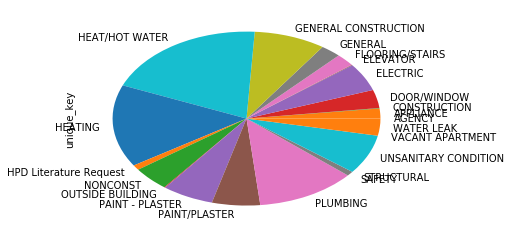

In [9]:
### CAN import other boroughs later
'''EXPLORING DATA IN 311 data frame below'''

'''(1)Which type of complaint should the Department of Housing Preservation and Development of New York City focus on first?'''
#df_311['incident_zip'].plot(kind='hist')
df_311['borough'].describe()
df_311['complaint_type'].describe(include='all') 
df_Comp=df_311.groupby('complaint_type').count()
df_Comp=df_Comp['unique_key']
df_Comp.plot(kind='pie')
### RESULT: It looks like  Heat/Hot Water and Heating are the most common complaints


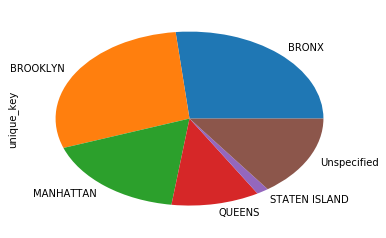

In [10]:
'''EXPLORING DATA IN 311 data frame below... Continued'''
df_Bor=df_311.groupby('borough').count()
df_Bor=df_Bor['unique_key']
df_Bor.plot(kind='pie')

In [11]:
df_Kind=df_311.groupby('location_type').count()
df_Kind=df_Kind['unique_key']
df_Kind

location_type
RESIDENTIAL BUILDING    5748827
Name: unique_key, dtype: int64

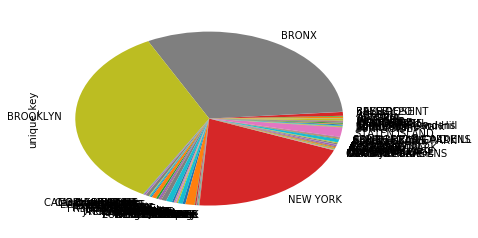

In [12]:
df_City=df_311.groupby('city').count()
df_City=df_City['unique_key']
df_City.plot(kind='pie')

In [13]:
#Result all three boroughs/cities ( brooklyn bronx newyork) have similar proportion, therefore, foucsing on the cheif complain types might be better
#Additionally, this approach is more politically correct

#END OF QUESTION 1


In [14]:
#Question 2

''' Should the Department of Housing Preservation and Development of New York City 
focus on any particular set of boroughs, ZIP codes, or street (where the complaints are severe) 
for the specific type of complaints you identified in response to Question 1?   '''
# I have identified that heating/ water hot is the primary problem, so now let's cross examime the data with borough/zip and see which part of NY where this problem is rampant 

' Should the Department of Housing Preservation and Development of New York City \nfocus on any particular set of boroughs, ZIP codes, or street (where the complaints are severe) \nfor the specific type of complaints you identified in response to Question 1?   '

In [15]:
#Let's filter out those 311 CALLs with the given complaint type
df_311_primary=df_311[(df_311['complaint_type']=='HEAT/HOT WATER' ) | (df_311['complaint_type']=='HEATING' ) ]# remember to use symbols for AND and OR instead
df_311_primary[df_311_primary['borough']=='BROOKLYN'].head(3)



,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
155,2019-03-26 21:10:48,42061623,HEAT/HOT WATER,11236.0,10412 AVENUE L,AVENUE L,ADDRESS,BROOKLYN,The Department of Housing Preservation and Dev...,BROOKLYN,40.642237,-73.889760,2019-03-28 02:08:55,RESIDENTIAL BUILDING,Closed
215,2019-03-28 17:58:48,42080655,HEAT/HOT WATER,11221.0,651 KNICKERBOCKER AVENUE,KNICKERBOCKER AVENUE,ADDRESS,BROOKLYN,The Department of Housing Preservation and Dev...,BROOKLYN,40.695335,-73.912229,2019-03-30 02:10:31,RESIDENTIAL BUILDING,Closed
217,2019-03-29 08:30:47,42082112,HEAT/HOT WATER,11226.0,2513 TILDEN AVENUE,TILDEN AVENUE,ADDRESS,BROOKLYN,The Department of Housing Preservation and Dev...,BROOKLYN,40.646708,-73.953788,2019-03-30 18:11:24,RESIDENTIAL BUILDING,Closed


In [16]:
df_311_primary.shape[0]/df_311.shape[0]

0.3503910725043667

In [17]:
df_311_primary_borough=df_311_primary.groupby('borough').count()

In [18]:
df_311_primary_borough=df_311_primary_borough['unique_key']

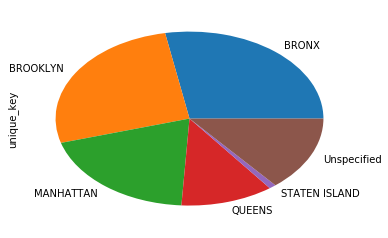

In [19]:
df_311_primary_borough.plot(kind='pie')  #this pie looks almost identical to the total problem pie chart by borough, which means that the problem is equally shared in all borough

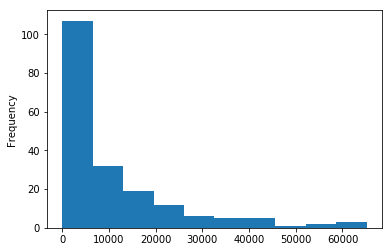

In [20]:
df_311_primary_zip=df_311_primary.groupby('incident_zip').count()
df_311_primary_zip=df_311_primary_zip['unique_key']
df_311_primary_zip.plot(kind='hist')# we can see that the heat problem is widespreading as the histogram is heaving left heavy, meaning 80% of zip has this problem have low number of 311 calls 

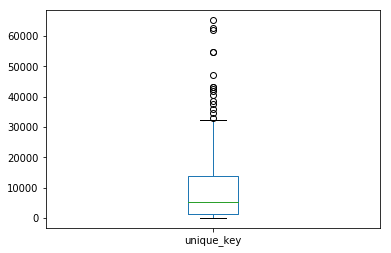

In [21]:
#df_311_primary_zip.sort_values(ascending=False)
df_311_primary_zip.sort_values(ascending=False).describe()
df_311_primary_zip.plot(kind='box')
# It looks like there are quite a few outliner zip with extremely high amount of 311 calls regarding heat/hot water Let's find those with # of call > 35000.



In [22]:
#df_311_primary_zip
df_311_heavyZip=df_311_primary_zip[df_311_primary_zip>35000]

In [23]:
df_311_heavyZip=df_311_heavyZip.keys() # this is an array of problematic zip

In [24]:
# OK These 14 zips have calls in excess of 35000 in regarding heat, well above the average of heat calls by zip of 5000.



In [25]:
#Let's see to what complaint-heavy zips correspond.
#df_311_primary[df_311_primary['incident_zip'].isin(df_311_heavyZip.unique())] # recall df 311 primary is the original df with primary problem mask applied

In [26]:
df_311_primary=df_311[(df_311['complaint_type']=='HEAT/HOT WATER' ) | (df_311['complaint_type']=='HEATING' ) ]# remember to use symbols for AND and OR instead
df_probZip=df_311_primary[df_311_primary['incident_zip'].isin(df_311_heavyZip.unique())]# this is a df of all the complaints from the problematic zips
df_probZip.groupby('borough').count()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,latitude,longitude,closed_date,location_type,status
borough,,,,,,,,,,,,,,
BRONX,377040,377040,377040,377040,377040,377040,377040,377040,377021,377040,377040,375784,377040,377040
BROOKLYN,123654,123654,123654,123654,123654,123654,123654,123654,123644,123654,123654,123284,123654,123654
MANHATTAN,77064,77064,77064,77064,77064,77064,77064,77064,77054,77064,77064,76281,77064,77064
Unspecified,92306,92306,92306,92306,92306,92306,92306,92306,92300,92306,92306,90974,92306,92306


In [27]:
#Let's focus on Bronx then because it contains 60% of the heat/hot water related complaints
#end of problem 2

"""
"Question 3 - Does the Complaint Type, that you identified in response to Question 1, 
have an obvious relationship with any particular characteristic(s) of the Houses?" 

"""
df_BX.head()


,Borough,ZipCode,Address,AssessTot,NumBldgs,NumFloors,UnitsRes,UnitsTotal,YearBuilt
0,BX,10454.0,122 BRUCKNER BOULEVARD,161100,1,0.0,0,0,0
1,BX,10454.0,126 BRUCKNER BOULEVARD,326700,2,1.0,0,1,1931
2,BX,10454.0,138 BRUCKNER BOULEVARD,879300,1,2.0,0,1,1931
3,BX,10454.0,144 BRUCKNER BOULEVARD,332550,1,5.0,15,15,1931
4,BX,10454.0,148 BRUCKNER BOULEVARD,125304,1,5.0,8,10,1920


In [28]:
df_probBX=df_probZip[df_probZip['borough']=='BRONX']# this contains all the calls relating to heat from bronx
df_probBXWithAddress=df_probBX[df_probBX['incident_address'].isin(df_BX['Address'])]

In [29]:
df_probBX.shape

(377040, 15)

In [30]:
df_probBXWithAddress.shape

(302862, 15)

In [31]:
df_BX=df_BX.rename(columns={'Address':'incident_address'})
#f_BX
'''we join two dfs together'''
df_result=pd.merge(df_BX, df_probBXWithAddress, how='inner', on=[ 'incident_address'])

In [32]:
df_result.shape

(303326, 23)

In [33]:
df_result.columns# the result df contains all heat calls in BRONX borough that contains a searchable address. Additional details of property included.

Index(['Borough', 'ZipCode', 'incident_address', 'AssessTot', 'NumBldgs',
       'NumFloors', 'UnitsRes', 'UnitsTotal', 'YearBuilt', 'created_date',
       'unique_key', 'complaint_type', 'incident_zip', 'street_name',
       'address_type', 'city', 'resolution_description', 'borough', 'latitude',
       'longitude', 'closed_date', 'location_type', 'status'],
      dtype='object')

In [34]:
#Let's play around with box plot and see which property charateristic is interesting

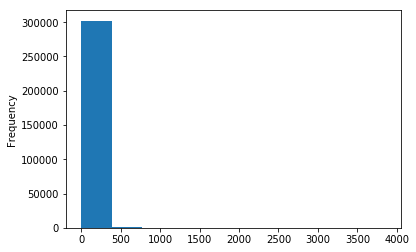

In [35]:
df_result['UnitsTotal'].plot(kind='hist')
#df_result['UnitsTotal'].plot(kind='box')

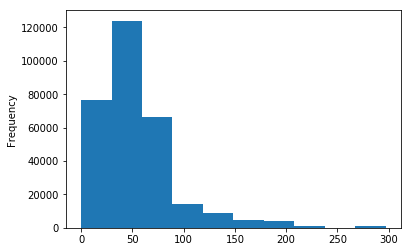

In [36]:
df_result[df_result['UnitsTotal']<300]['UnitsTotal'].plot(kind='hist')

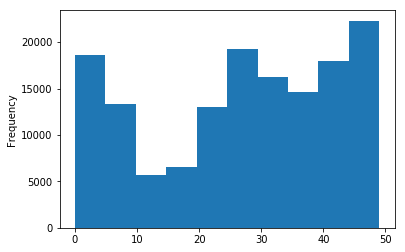

In [37]:
df_result[df_result['UnitsTotal']<50]['UnitsTotal'].plot(kind='hist')

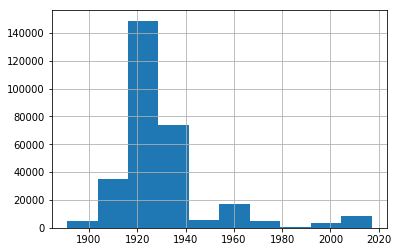

In [38]:
df_result[df_result['YearBuilt']>1800]['YearBuilt'].hist()# This is Interesting. 100 Year old house seems to have the most problem in bronx and relating to heat

In [39]:
df_result[df_result['YearBuilt']>1800]['YearBuilt'].describe()

count    302465.000000
mean       1931.605382
std          19.960962
min        1891.000000
25%        1923.000000
50%        1927.000000
75%        1931.000000
max        2017.000000
Name: YearBuilt, dtype: float64

In [40]:
'''End of Problem 3--> The yest is highly corrlated to the year a house s built'''
'''Start of Problem 4   -->Can a predictive model be built for future prediction of the possibility of complaints of the
specific type that you identified in response to Question 1?'''
# So we weill be doing a Logic regression. But first we need the Bronx df with 311 call information attached.
df_probAddress=df_probBXWithAddress[['incident_address','incident_zip']]
df_probAddress['is311']=1

df_BXWith311=pd.merge(df_BX, df_probAddress, how='outer', on=[ 'incident_address'])
print('df_BXWith311.shape is ') 
print(df_BXWith311.shape)
print('df_BX.shape is  ')
print(df_BX.shape)
df_probAddress.shape
# Bad news: the 311 df has duplicate entry, lots of it actually, 302862 calls but only 89854 addresses match
# we need to clean up the data 
# 

df_BXWith311.shape is 
(385394, 11)
df_BX.shape is  
(89854, 9)


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(302862, 3)

In [41]:
#df_BXWith311.groupby('incident_address').count()
df_BXWith311=df_BXWith311[df_BXWith311[ 'YearBuilt']!=0]
df_BXWith311.shape

(378227, 11)

In [42]:
df_BXWith311.head(8) # Let's group this df by its address and average all variables

,Borough,ZipCode,incident_address,AssessTot,NumBldgs,NumFloors,UnitsRes,UnitsTotal,YearBuilt,incident_zip,is311
1,BX,10454.0,126 BRUCKNER BOULEVARD,326700,2,1.0,0,1,1931,NaN,NaN
2,BX,10454.0,138 BRUCKNER BOULEVARD,879300,1,2.0,0,1,1931,NaN,NaN
3,BX,10454.0,144 BRUCKNER BOULEVARD,332550,1,5.0,15,15,1931,NaN,NaN
4,BX,10454.0,148 BRUCKNER BOULEVARD,125304,1,5.0,8,10,1920,NaN,NaN
14,BX,10454.0,519 EAST 132 STREET,153900,2,1.0,0,2,1931,NaN,NaN
15,BX,10454.0,517 EAST 132 STREET,334350,1,3.0,0,1,1931,NaN,NaN
25,BX,10454.0,290 EAST 132 STREET,341100,1,1.0,0,1,1931,NaN,NaN
33,BX,10452.0,NaN,0,0,0.0,0,0,2012,NaN,NaN


In [43]:
df_CleanedBXWith311=df_BXWith311.groupby('incident_address').mean()
df_CleanedBXWith311.head(8)

,ZipCode,AssessTot,NumBldgs,NumFloors,UnitsRes,UnitsTotal,YearBuilt,incident_zip,is311
incident_address,,,,,,,,,
1 ALDEN PARK,10465.0,119778.0,12.5,1.0,10.5,10.5,1927.5,NaN,NaN
1 ANGELAS PLACE,10465.0,530628.0,17.0,2.0,27.0,27.0,2004.0,NaN,NaN
1 BANES COURT,10473.0,28224.0,1.0,3.0,2.0,2.0,2002.0,NaN,NaN
1 BEDFORD PARK BLVD,10468.0,819000.0,1.0,1.0,0.0,5.0,1928.0,NaN,NaN
1 BLACKSTONE PLACE,10471.0,101019.0,1.0,2.0,1.0,1.0,1920.0,NaN,NaN
1 CAROLL STREET,10464.0,46655.0,5.0,1.0,5.0,5.0,1930.0,NaN,NaN
1 CITY ISLAND AVENUE,10464.0,593100.0,2.0,1.0,0.0,2.0,2013.0,NaN,NaN
1 DASH PLACE,10463.0,45476.0,3.0,2.0,2.0,2.0,1915.0,NaN,NaN


In [44]:
df_CleanedBXWith311.shape # ok so we have 83377 houses with cleaned data. Let's explore it a bit.

(83377, 9)

In [45]:
df_data=df_CleanedBXWith311
(df_data['is311']==1).describe() # so this tells me only about 10% of property in Bronx made a call on those primary
#issues(heat/ water) for all those years

count     83377
unique        2
top       False
freq      75656
Name: is311, dtype: object

In [46]:
df_data.drop(columns='incident_zip',inplace=True)
df_data.drop(columns='ZipCode',inplace=True)

In [48]:
pass # now for the logic reg.

In [49]:
X = np.asarray(df_data[['AssessTot','NumBldgs','NumFloors','UnitsRes','UnitsTotal','YearBuilt']])

In [80]:
df_data['is311']=df_data['is311'].fillna(0)

In [82]:
y=df_data['is311']

In [83]:
# We will not split data here because it's the only model we will use, and we are predicting, so model selection isn't as important.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X,y)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [85]:
LR_result=LR.predict(X)

In [87]:
LR_result[1:50]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [96]:
LR_testResult=np.asarray(y)


In [93]:
from sklearn.metrics import classification_report, confusion_matrix

In [97]:
print (classification_report(LR_testResult, LR_result)) # the f1score is quite bad

             precision    recall  f1-score   support

        0.0       0.91      1.00      0.95     75656
        1.0       0.23      0.01      0.01      7721

avg / total       0.84      0.91      0.86     83377



In [130]:
# Let's use fewer variable
from sklearn import preprocessing
X = np.asarray(df_data[['NumBldgs','NumFloors','UnitsRes','UnitsTotal','YearBuilt']])
#X = np.asarray(df_data[['YearBuilt','UnitsTotal']])
X = preprocessing.StandardScaler().fit(X).transform(X)

In [138]:
LR = LogisticRegression(C=0.01).fit(X,y)
LR_result=LR.predict(X)
LR_testResult=np.asarray(y)
print (classification_report(LR_testResult, LR_result))# The recall of correctly predicting a call when quite low, however, the total f1 score is good due to the large 
#queatntiy of 0, that is, the model successfully predict those who do not call most of the time.

             precision    recall  f1-score   support

        0.0       0.92      0.99      0.95     75656
        1.0       0.55      0.14      0.22      7721

avg / total       0.88      0.91      0.88     83377



In [134]:
y.describe()

count    83377.000000
mean         0.092603
std          0.289878
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: is311, dtype: float64